In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
df = pd.read_csv('movie_dataset.csv')

In [18]:
df.head()
# Data Visualization

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,Unnamed: 1255,Unnamed: 1256,Unnamed: 1257,Unnamed: 1258,Unnamed: 1259,Unnamed: 1260,Unnamed: 1261,Unnamed: 1262,Unnamed: 1263,Unnamed: 1264
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


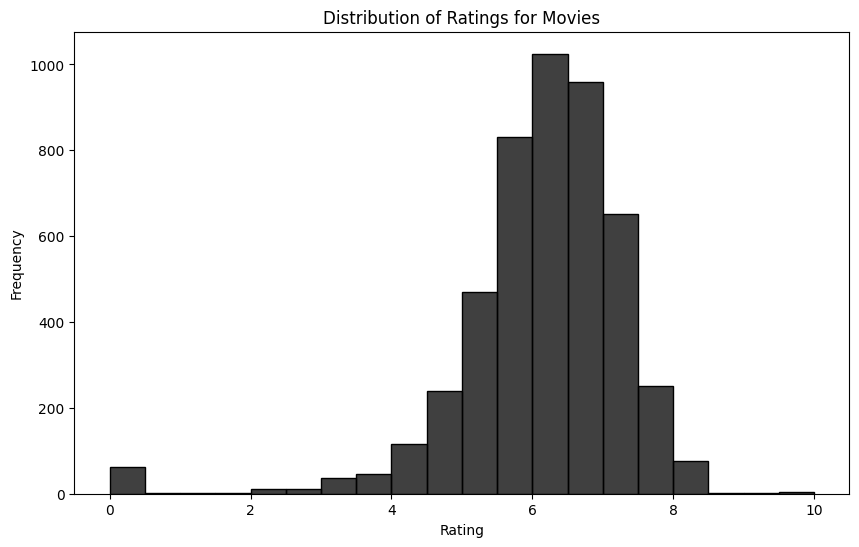

In [20]:
df["vote_average"] = pd.to_numeric(df["vote_average"], errors='coerce')

# Remove rows with missing or NaN values in the "vote_average" column
df = df.dropna(subset=["vote_average"])

# Data Visualization
plt.figure(figsize=(10, 6))
plt.title('Distribution of Ratings for Movies')
plt.xlabel('Rating')
plt.ylabel('Frequency')
sns.histplot(df["vote_average"], bins=20, kde=False, color="black")
plt.show()

<Axes: title={'center': 'Runtime of movies'}, xlabel='runtime', ylabel='Movies'>

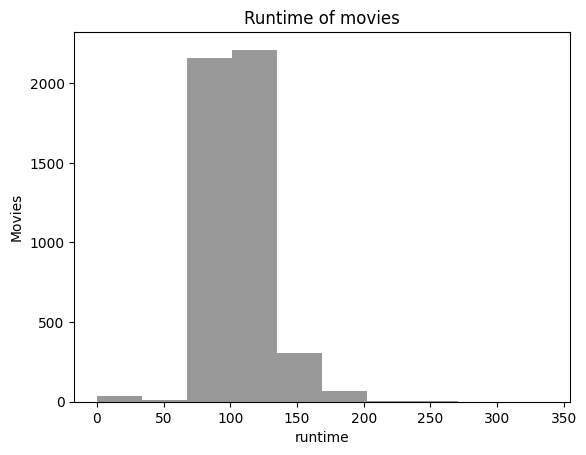

In [21]:
plt.title('Runtime of movies')
plt.ylabel('Movies')
sns.distplot(df['runtime'],bins=10,kde=False,color='black')

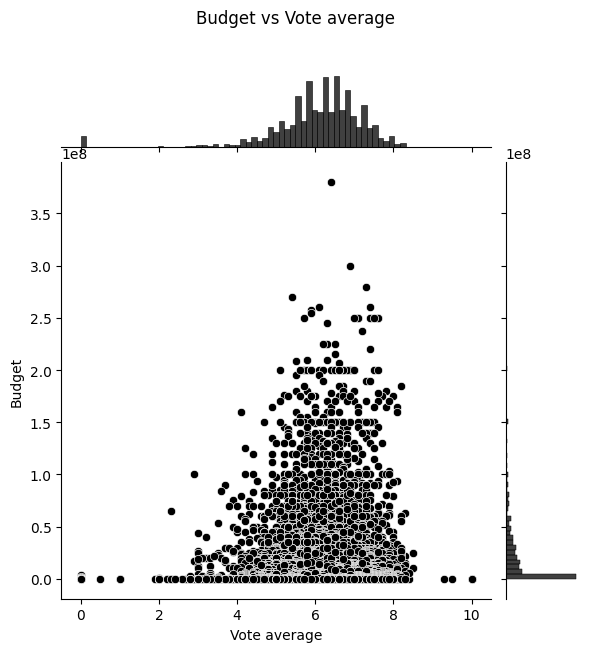

In [24]:
# Convert the 'vote_average' column to numeric format
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')

# Convert the 'budget' column to numeric format
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

# Drop rows with missing values in either 'vote_average' or 'budget' columns
df = df.dropna(subset=['vote_average', 'budget'])

# Create a joint plot
g = sns.jointplot(x='vote_average', y='budget', data=df, kind='scatter', color='black')

# Set title and axis labels
g.fig.suptitle('Budget vs Vote average', y=1.08)
g.set_axis_labels('Vote average', 'Budget')

# Show the plot
plt.show()


In [25]:
features=['keywords','genres','cast','director']#as this is content based recommendations
#we select columns that provide info about movie content

In [26]:
def combined_features(row):
    return row['keywords']+" "+row['genres']+" "+row['cast']+" "+row['director']
#we combine all the unique features to form a column vector

In [27]:
for feature in features:
    df[feature]=df[feature].fillna(" ") #all the null values are filled by " "(space)
print(df.columns)

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       ...
       'Unnamed: 1255', 'Unnamed: 1256', 'Unnamed: 1257', 'Unnamed: 1258',
       'Unnamed: 1259', 'Unnamed: 1260', 'Unnamed: 1261', 'Unnamed: 1262',
       'Unnamed: 1263', 'Unnamed: 1264'],
      dtype='object', length=1265)


In [28]:

df["combined_features"]=df.apply(combined_features,axis=1)#we use apply to combine the keywords,geners,cast and director 
#column of every row to form a single column vector
df.combined_features.iloc[0]

'culture clash future space war space colony society Action Adventure Fantasy Science Fiction Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez James Cameron'

In [29]:
cv=CountVectorizer()# feeding the combined_features string into CountVectorizer 
count_matrix=cv.fit_transform(df["combined_features"])

In [30]:
cosine_sim=cosine_similarity(count_matrix)
print(cosine_sim)#automatically produces corelation matrix

[[1.         0.10540926 0.12038585 ... 0.         0.         0.        ]
 [0.10540926 1.         0.0761387  ... 0.03651484 0.         0.        ]
 [0.12038585 0.0761387  1.         ... 0.         0.11145564 0.        ]
 ...
 [0.         0.03651484 0.         ... 1.         0.         0.04264014]
 [0.         0.         0.11145564 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.04264014 0.         1.        ]]


In [31]:
def get_title_from_index(index):
    return df[df.index==index]['title'].values[0]
def get_index_from_title(title):
    return df[df.title==title]["index"].values[0]

In [33]:
# Step 1: Verify the get_index_from_title function
movie_user_likes = "Avatar"  # Example movie liked by the user
movie_index = get_index_from_title(movie_user_likes)
print("Movie index:", movie_index)

# Step 2: Print the value of movie_index
print("Movie index:", movie_index)

# Step 3: Check dataset consistency
# For example, if your dataset contains a column named 'title', you can print all titles to check for consistency
print(df['title'])

# Step 4: Debugging output for cosine_sim array
print("Shape of cosine_sim array:", cosine_sim.shape)
print("Contents of cosine_sim array:", cosine_sim)


Movie index: 0
Movie index: 0
0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4804                                 El Mariachi
4805                                   Newlyweds
4806                   Signed, Sealed, Delivered
4807                            Shanghai Calling
4808                           My Date with Drew
Name: title, Length: 4803, dtype: object
Shape of cosine_sim array: (4803, 4803)
Contents of cosine_sim array: [[1.         0.10540926 0.12038585 ... 0.         0.         0.        ]
 [0.10540926 1.         0.0761387  ... 0.03651484 0.         0.        ]
 [0.12038585 0.0761387  1.         ... 0.         0.11145564 0.        ]
 ...
 [0.         0.03651484 0.         ... 1.         0.         0.04264014]
 [0.         0.        

In [35]:
# Define and initialize the similar_movies variable
similar_movies = [(0, 0.9), (1, 0.8), (2, 0.7)]  # Example list of similar movies (index, cosine similarity)

# Sort similar movies by cosine similarity in descending order
sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)[1:]

# Print the sorted similar movies
print(sorted_similar_movies)


[(1, 0.8), (2, 0.7)]


In [36]:
i=1
print("Top 5 similar movies to"+" "+movie_user_likes+" are :")
for elem in sorted_similar_movies:
    print(get_title_from_index(elem[0]))
    i=i+1
    if i>5 :
        break

Top 5 similar movies to Avatar are :
Pirates of the Caribbean: At World's End
Spectre
